In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Read Data

In [2]:
data = pd.read_excel("mtcars.xlsx")

In [3]:
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
len(data)

32

# Adding new Column mpg_level


In [5]:
mpg_level = []
for k in data['mpg']:
    if k < 20:
        mpg_level.append("low")
    if k >= 20 and k <=30:
        mpg_level.append("medium")
    if k > 30:
        mpg_level.append("hard")

In [6]:
len(mpg_level)

32

In [7]:
data['mpg_level'] = mpg_level

In [8]:
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,medium
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,medium
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,low


# Add index

In [9]:
data.index = data["Cars"]
del data["Cars"]
#print(data.index)

In [10]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
Cars,,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,medium
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,medium
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,medium
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,medium
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,low


# Statistical summary 

In [11]:

data.loc[:,:].describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [12]:
data[data['mpg_level'] == 'hard']

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
Cars,,,,,,,,,,,,
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,hard
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,hard
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,hard
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,hard


### Mobil Fiat 128, Honda civic, toyota corolla, dan lotus europa adalah mobil yg memiliki daya tempuh sangat tinggi 

# Data visualization

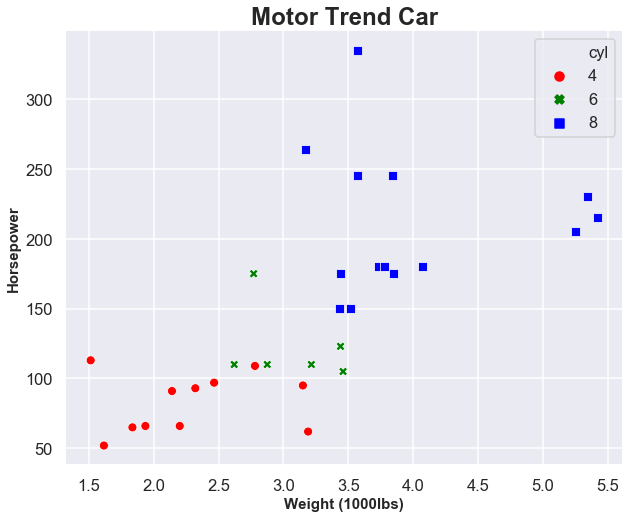

In [13]:
sns.set_style("darkgrid")
#sns.set_style("ticks")
sns.set_context("talk")

plt.figure(figsize=(10,8)) 
sns.scatterplot(x=data["wt"], y=data["hp"], hue=data["cyl"], palette=['red','green','blue'],
                data=data, style='cyl', legend='brief', sizes=(800,1000)
                )
plt.title('Motor Trend Car', fontsize=24, fontweight='bold')
plt.xlabel("Weight (1000lbs)").set_fontsize('15')
plt.xlabel("Weight (1000lbs)").set_fontweight("bold")
plt.ylabel("Horsepower").set_fontsize('15')
plt.ylabel("Horsepower").set_fontweight("bold");

### berdasarkan grafik di atas kebanyakan mobil yg memiliki berat di bawah 3.5 memiliki daya yang rendah (kurang dari 150) dan hanya memiliki 4 silinder.
### sedangkan mobil yg meiliki 8 silinder cendrung memiliki daya yang besar, rata-rata di atas 150 horse power dan cendrung lebih berat dari pada mobil yg memiliki daya rendah

# Distribution of Weight

Text(0.5,1,'Histogram of Weight in 1000 lbs')

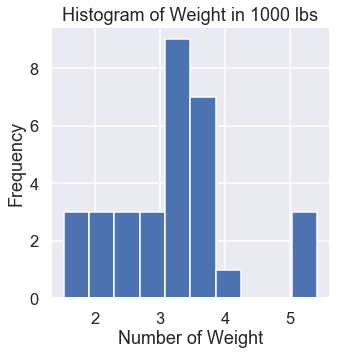

In [14]:
plt.figure(figsize=(5,5))
plt.hist(data['wt']);
plt.ylabel("Frequency")
plt.xlabel("Number of Weight")
plt.title("Histogram of Weight in 1000 lbs")

### Dari histogram di atas dapat di ketahui bahwa kebanyakan mobil memiliki berat antara 3-4 lbs

# Distribution of Gear

Text(0.5,1,'Histogram of Gear ')

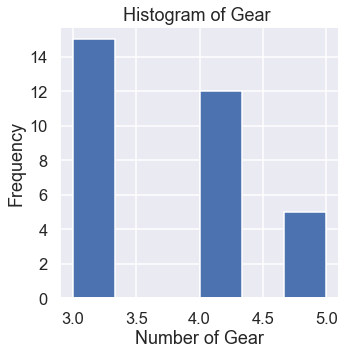

In [15]:
plt.figure(figsize=(5,5))
plt.hist(data['gear'],bins='auto');
plt.ylabel("Frequency")
plt.xlabel("Number of Gear")
plt.title("Histogram of Gear ")

### kebanyakan dari mobil meliki gear 3 dengan frequensi 15 dan sebagian kecil memiliki gear 5 dengan frekuensi 5

# Distribution of Gross horsepower

Text(0.5,1,'Histogram of Horsepower ')

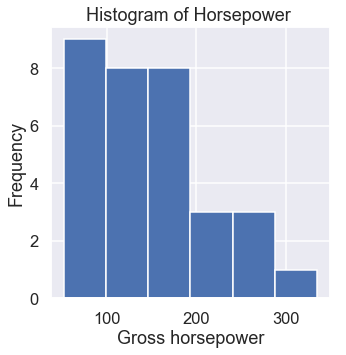

In [16]:
plt.figure(figsize=(5,5))
plt.hist(data['hp'],bins='auto');
plt.ylabel("Frequency")
plt.xlabel("Gross horsepower")
plt.title("Histogram of Horsepower ")

### kebanyakan mobil memiliki power di bawah 200 horse power dan hanya sebagian kecil mobil yg memiliki daya di atas 200 horse power

# Plot Weight vs Milage

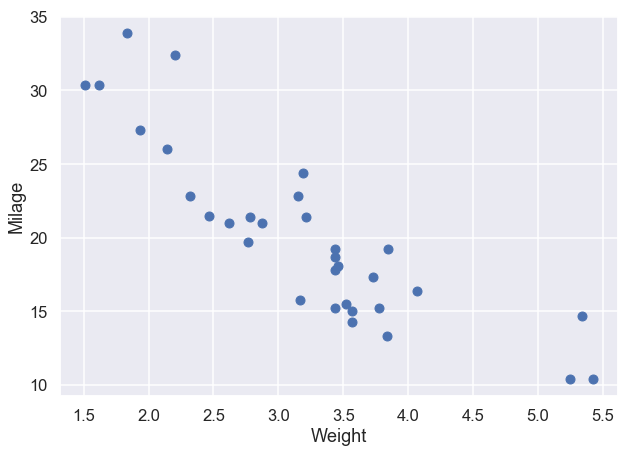

In [17]:
plt.figure(figsize=(10,7))
plt.plot(data.wt, data.mpg, 'o')
plt.xlabel('Weight')
plt.ylabel('Milage')
#plt.xticks([])
plt.show()

### semakin berat mobil maka semakin kecil daya tempuh yg dapat di capai dalam satu mil

# Plot Horsepower vs Milage

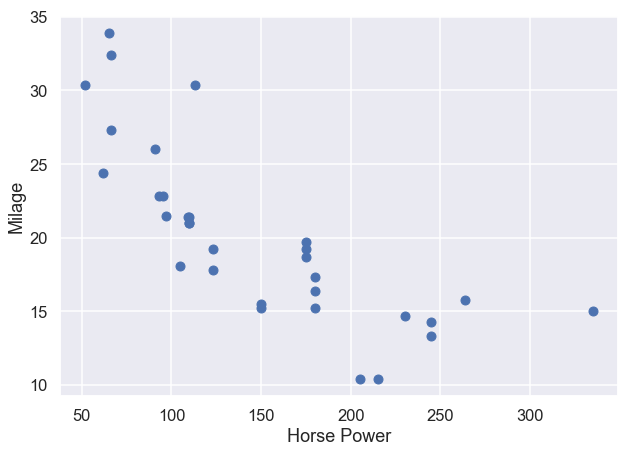

In [18]:
plt.figure(figsize=(10,7))
plt.plot(data.hp, data.mpg, 'o')
plt.xlabel('Horse Power')
plt.ylabel('Milage')
#plt.xticks([])
plt.show()

### semakin besar daya mobil maka semakin kecil jarak yg dapat di tempuh